# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [72]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [97]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [42]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

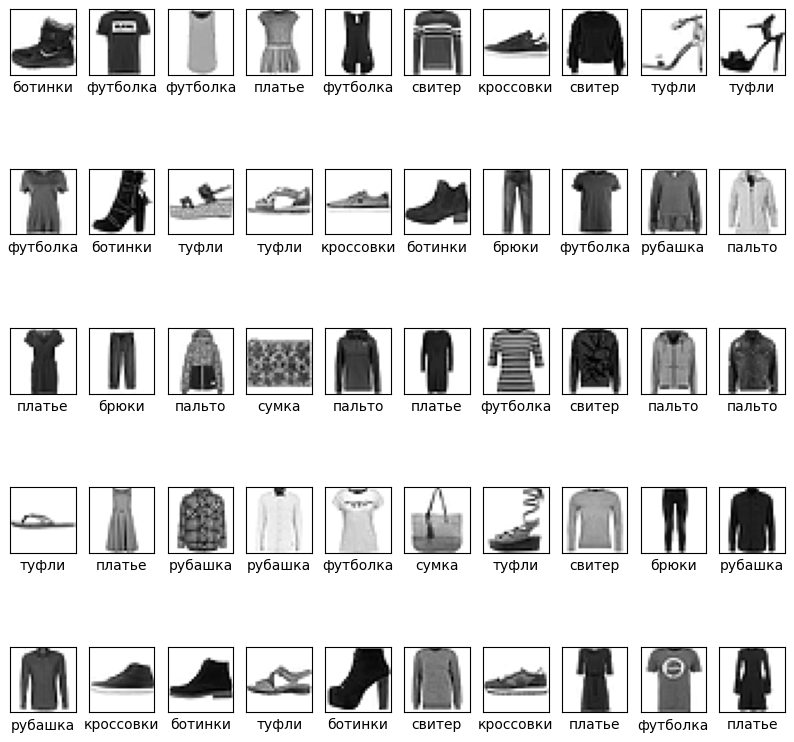

In [43]:
plt.figure(figsize=(10,10))
for i in range(0,50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

## Предобработка

**Нормализуйте данные X_train и X_test**

In [98]:
x_train = (np.expand_dims(x_train, axis=-1)/255.).astype(np.float32)
x_test = (np.expand_dims(x_test, axis=-1)/255.).astype(np.float32)

In [45]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [46]:
x_train.shape

(60000, 28, 28, 1)

**Преобразуйте  y_train и y_test в one_hot представления**

In [47]:
print(y_train[0])
print(classes[y_train[0]])

9
ботинки


In [105]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [49]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [57]:
def build_cnnmodel():
    CNNmodel = Sequential([
        
        Conv2D(filters=32, kernel_size=(4,4), activation=tf.nn.relu),
        
        MaxPool2D(pool_size=(2,2)),
        
        Flatten(),
        
        Dense(128, activation=tf.nn.relu),
        
        Dense(10, activation=tf.nn.softmax),
    ])
    return CNNmodel

model = build_cnnmodel()

In [60]:
model.predict(x_train[[0]])
print(model.summary())

1/1 [==============================] - 1s 540ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable param

In [61]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [69]:
BATCH_SIZE = 64
EPOCHS = 10
model.fit(x_train, y_train, 
          batch_size=BATCH_SIZE, 
          #epochs=EPOCHS)
          epochs=5)

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1001 - accuracy: 0.9637
Epoch 2/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0897 - accuracy: 0.9681
Epoch 3/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0802 - accuracy: 0.9712
Epoch 4/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0721 - accuracy: 0.9747
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.0643 - accuracy: 0.9772


In [70]:
model.save('cnnmodel_1.h5')

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test**

In [71]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.3604 - accuracy: 0.9123


In [ ]:
model = load_model('cnnmodel_1.h5')

In [87]:
prediction = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [89]:
print("Предсказанное значение: ", classes[np.argmax(prediction[0])])
print("Реальное значение:  ", classes[np.argmax(y_test[0])])

Предсказанное значение:  ботинки
Реальное значение:   ботинки


**Проверка работы на реальных картинках из интернета**

In [183]:
img = image.load_img('test.jfif', target_size=(28, 28), color_mode = "grayscale")
img2 = image.load_img('test1.jpg', target_size=(28, 28), color_mode = "grayscale")

In [184]:
img

In [185]:
img2

In [186]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
x2 = image.img_to_array(img2)
# Меняем форму массива в плоский вектор
x = ((255 - np.expand_dims(x, axis=0))/255.).astype(np.float32)
x2 = ((255 - np.expand_dims(x2, axis=0))/255.).astype(np.float32)

In [187]:
x.shape

(1, 28, 28, 1)

In [188]:
prediction = model.predict(x)
prediction2 = model.predict(x2)

1/1 [==============================] - 0s 37ms/step


In [189]:
print("На картинке 1 : ", classes[np.argmax(prediction)])
print("На картинке 2 : ", classes[np.argmax(prediction2)])

На картинке 1 :  сумка
На картинке 2 :  футболка


**Оценка метрик выводит ошибку, хотя вывод нейросети как и y_test находятся в формате oneHotEncode**

In [128]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [129]:
#y_pred.shape
y_pred[1]

array([8.5578528e-10, 1.6528716e-22, 1.0000000e+00, 1.3983423e-18,
       4.3882986e-10, 8.6957924e-20, 1.5944145e-12, 1.1256563e-15,
       1.7063636e-19, 1.2151517e-17], dtype=float32)

In [130]:
#y_test.shape
y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [132]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)
# не понимаю почему выдает эту ошибку, формат y_pred и y_test совпадает

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets